### Wikipedia Verileri ile Metin Ön İşleme ve Veri Görselleştirme

**İş Problemi**

Wikipedia metinleri içeren **wikipedia_data.csv** veri setine gerekli metin ön işleme ve görselleştirme işlemlerini yapınız.

#### Görev 1: Metin Ön İşleme İşlemlerini Gerçekleştiriniz.

In [1]:
# Gerekli kütüphane ve fonksiyonların kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import warnings
warnings.filterwarnings("ignore")

# !pip install nltk
# !pip install textblob
# !pip install wordcloud

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word, TextBlob
from wordcloud import WordCloud

df = pd.read_csv("datasets/wikipedia_data.csv", index_col = 0)

df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [2]:
df.shape

(10859, 1)

In [3]:
df = df[0:2000]

df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
df.shape

(2000, 1)

**Adım 1:** Metin ön işleme işlemlerini gerçekleştirebilmek için **clean_text** adında fonksiyon oluşturunuz. Fonksiyon;

• Büyük-küçük harf dönüşümü,

• Noktalama işaretlerini çıkarma,

• Numerik ifadeleri çıkarma İşlemlerini gerçekleştirmeli.

In [5]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '', regex = True)
    text = text.str.replace("\n" , '', regex = True)
    # Numbers
    text = text.str.replace('\d', '', regex = True)
    return text

**Adım 2:** Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [6]:
df["text"] = clean_text(df["text"])

df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


**Adım 3:** Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak **remove_stopwords** adında fonksiyon yazınız.

In [7]:
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

**Adım 4:** Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [8]:
df["text"] = remove_stopwords(df["text"])

df.head()

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


**Adım 5:** Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız. 

In [9]:
sil = pd.Series(' '.join(df["text"]).split()).value_counts()[-1000:]

sil

stumpssometimes    1
fresno             1
porteous           1
shankgiant         1
bootripping        1
                  ..
nif                1
standardsnet       1
patternsâ          1
domainsnetwork     1
fluidssolids       1
Name: count, Length: 1000, dtype: int64

In [10]:
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

df["text"]

1       anovoanovo formerly novo computer services com...
2       battery indicatora battery indicator also know...
3       bob peaserobert allen pease august â â june an...
4       cavnetcavnet secure military forum became oper...
5       clidarthe clidar scientific instrument used me...
                              ...                        
1996    edinburgh calotype clubthe edinburgh calotype ...
1997    endrinendrin organochloride chemical formula c...
1998    ethylene glycol dinitrateethylene glycol dinit...
1999    forges de syamthe forges de syam syam forges f...
2000    frankkamenetskii theoryin combustion frankkame...
Name: text, Length: 2000, dtype: object

**Adım 6:** Metinleri tokenize edip sonuçları gözlemleyiniz.

In [11]:
df["text"] = df["text"].apply(lambda x: TextBlob(x).words)

df["text"]

1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, â, â,...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frankkamenetskii, theoryin, combustion, frank...
Name: text, Length: 2000, dtype: object

**Adım 7:** Lemmatization işlemi yapınız.

In [12]:
# ran, runs, running ----> run (normalleştirme)

In [13]:
# df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# df.head()

**Adım 1:** Metindeki terimlerin frekanslarını hesaplayınız.

In [14]:
tf = df["text"].apply(lambda x: pd.Series(x).value_counts()).sum().reset_index()  # Her kelimenin frekansını hesaplar

tf.columns = ["words", "tf"]                                                      # Kolon isimlerini yeniden adlandırdık

tf.head()

,words,tf
0,company,1643.0
1,anovoanovo,1.0
2,score,93.0
3,news,145.0
4,awards,161.0


**Adım 2:** Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

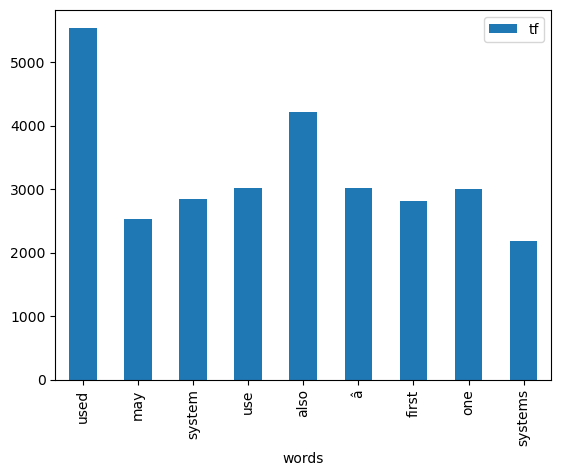

In [15]:
# 2000'den fazla geçen kelimelerin görselleştirilmesi

tf[tf["tf"] > 2000].plot.bar(x = "words", y = "tf")

plt.show()

**Adım 3:** Kelimeleri WordCloud ile görselleştiriniz.

In [16]:
text = " ".join(" ".join(i) for i in df["text"])

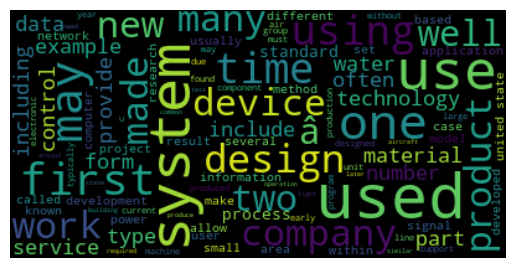

In [17]:
wordcloud = WordCloud(max_font_size = 50,
max_words = 100,
background_color = "black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız.

**Adım 1:** Metin ön işleme işlemlerini gerçekleştiriniz.

**Adım 2:** Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.

**Adım 3:** Fonksiyonu açıklayan 'docstring' yazınız.

In [18]:
def wiki_preprocess(text, Barplot = False, Wordcloud = False):
    
    """
    Textler Üzerinde Veri Ön İşleme İşlemleri yapar.

    :param text: DataFrame'deki textlerin olduğu değişken
    :param Barplot: Barplot görselleştirme
    :param Wordcloud: Wordcloud görselleştirme
    :return: text


    Example:
            wiki_preprocess(dataframe[col_name])

    """
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace('[^\w\s]', '', regex = True)
    text = text.str.replace("\n", '', regex = True)
    # Numbers
    text = text.str.replace('\d', '', regex = True)
    # Stopwords
    sw = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    # Rarewords / Custom Words
    sil = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sil))

    if Barplot:
        # Terim Frekanslarının hesaplanması
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
        # Sütunların isimlendirilmesi
        tf.columns = ["words", "tf"]
        # 5000'den fazla geçen kelimelerin görselleştirlmesi
        tf[tf["tf"] > 2000].plot.bar(x = "words", y = "tf")
        plt.show()

    if Wordcloud:
        # Kelimeleri birlestirdik
        text = " ".join(i for i in text)
        # wordcloud görselleştirmenin özelliklerini belirtiyoruz.
        wordcloud = WordCloud(max_font_size = 50,
                              max_words = 100,
                              background_color = "white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation = "bilinear")
        plt.axis("off")
        plt.show()

    return text

In [19]:
df = pd.read_csv("datasets/wikipedia_data.csv", index_col = 0)

df = df[0:2000]

df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [20]:
wiki_preprocess(df["text"])

1       anovoanovo formerly novo computer services com...
2       battery indicatora battery indicator also know...
3       bob peaserobert allen pease august â â june an...
4       cavnetcavnet secure military forum became oper...
5       clidarthe clidar scientific instrument used me...
                              ...                        
1996    edinburgh calotype clubthe edinburgh calotype ...
1997    endrinendrin organochloride chemical formula c...
1998    ethylene glycol dinitrateethylene glycol dinit...
1999    forges de syamthe forges de syam syam forges f...
2000    frankkamenetskii theoryin combustion frankkame...
Name: text, Length: 2000, dtype: object

In [21]:
df = pd.read_csv("datasets/wikipedia_data.csv", index_col = 0)

df = df[0:2000]

df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [22]:
# wiki_preprocess(df["text"], True, True)